In [18]:
##########################################################################

# I acknowledge the use of ChatGPT and AI Tools in Helping me Code and Debug the work in this File

##########################################################################

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [61]:
# file_path =  "/scratch/network/mm4846/transcripts_2006_2025_03_18_final_master.csv"
# df_enhanced.to_csv(file_path)
# df_light = df_enhanced.drop(columns = ['presentation','qna', 'qna_pairs', 'all_questions', 'question_answer_pairs', 'question_answer_pairs_parsed'])
# file_path =  "/scratch/network/mm4846/transcripts_2006_2025_03_18_final_master_light.csv"
# df_light.to_csv(file_path)

# file_path = "/scratch/network/mm4846/transcripts_2006_2025_03_18_pand_buyback.csv"
# df_pands = pd.read_csv(file_path, usecols = ['ticker', 'assigned_quarter', 'pandemic_mentions_qna_question_count', 'buyback_mentions_qna_question_count'])

# df_enhanced = df_enhanced.merge(df_pands,     on=["ticker", "assigned_quarter"],
#     how="left"  # keeps all rows from df_enhanced, fills NA where no match
# )


# file_path =  "/scratch/network/mm4846/03_24_vectors_full_v2.csv"
# df_vectorized = pd.read_csv(file_path)

# file_path = "/scratch/network/mm4846/Thesis Data/Emploiyees_Yearly.csv"

# df2 = pd.read_csv(file_path)

# file_path = "/scratch/network/mm4846/S&P500_Market_Cap.csv"

# df_market_caps = pd.read_csv(file_path)


# df_vectorized.to_csv(file_path)

file_path = "/scratch/network/mm4846/final_returns.csv"

df_returns = pd.read_csv(file_path)


# df_enhanced['buyback_mentions_qna_question_count'].mean()

In [28]:
# df_market_caps.columns

Index(['gvkey', 'datadate', 'fyearq', 'fqtr', 'indfmt', 'consol', 'popsrc',
       'datafmt', 'tic', 'conm', 'curcdq', 'datacqtr', 'datafqtr', 'costat',
       'mkvaltq', 'ticker', 'assigned_quarter'],
      dtype='object')

In [32]:
# df_market_caps['ticker'] = df_market_caps['tic'].copy()
# df_market_caps['assigned_quarter'] = df_market_caps['datacqtr'].copy()
df_market_caps_condensed = df_market_caps[['ticker', 'assigned_quarter', 'mkvaltq']]
df_vectorized = pd.merge(
    df_vectorized,
    df_market_caps_condensed,
    on=['ticker', 'assigned_quarter'],
    how='left'  # or 'inner' if you want to drop unmatched
)

In [38]:
df_vectorized['mkvaltq_percentile'] = df_vectorized.groupby('assigned_quarter')['mkvaltq'] \
    .rank(pct=True)

# Step 2: Map percentiles to terciles
def assign_tercile(pct):
    if pd.isna(pct):
        return np.nan
    elif pct > 2/3:
        return 1  # Top third
    elif pct > 1/3:
        return 2  # Middle third
    else:
        return 3  # Bottom third

df_vectorized['market_cap_tercile'] = df_vectorized['mkvaltq_percentile'].apply(assign_tercile)


In [4]:
# df_vectorized['questions_vector'][31275]
import ast
import numpy as np
def safe_parse_vector(val):
    if isinstance(val, str) and val.strip().startswith("["):
        try:
            return ast.literal_eval(val)
        except (ValueError, SyntaxError):
            return np.nan  # or [] if you prefer empty lists
    return np.nan  # or [] for consistency

# Apply safely

column_names = df_vectorized.columns[13:]
column_names
for name in column_names: 
    df_vectorized[name] = df_vectorized[name].apply(safe_parse_vector)
# df_vectorized['episodic_vector'] = df_vectorized['episodic_vector'].apply(safe_parse_vector)

In [200]:
# df_enhanced = df_enhanced.drop(columns = ['buyback_mentions_qna_question_count_y', 'pandemic_mentions_qna_question_count_y'])
# df_enhanced['buyback_mentions_qna_question_count'] = df_enhanced['buyback_mentions_qna_question_count_y'].copy()
# df_enhanced['pandemic_mentions_qna_question_count'] = df_enhanced['pandemic_mentions_qna_question_count_y'].copy()
# df_enhanced['pandemic_mentions_qna_question_count']
       # 'pandemic_mentions_qna_question_count_y']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
36191    0.0
36192    0.0
36193    1.0
36194    0.0
36195    0.0
Name: pandemic_mentions_qna_question_count, Length: 36196, dtype: float64

In [190]:
# mapping = {}

# # Step 1: Get relevant columns
# cols = df_light.columns

# # Step 2: Filter for _presentation or _qna_question_count
# target_cols = [col for col in cols if col.endswith("_presentation") or col.endswith("_qna_question_count")]

# # Step 3: Extract base topic names
# topics = set()
# for col in target_cols:
#     if col == "other_qna_question_count":
#         continue  # handle separately
#     topic = col.replace("_mentions_presentation", "") \
#                .replace("_mentions_qna_question_count", "") \
#                .replace("_presentation", "") \
#                .replace("_qna_question_count", "")
#     topics.add(topic)

# # Step 4: Sort topics and build mapping
# sorted_topics = sorted(topics)
# for i, topic in enumerate(sorted_topics, start=1):
#     mapping[i] = topic

# # Step 5: Add 'other' at the end if it's present
# if "other_qna_question_count" in df_light.columns:
#     mapping[len(mapping) + 1] = "other"

# # Output the mapping
# print(mapping)


In [5]:
# df_vectorized = df_vectorized[df_vectorized["assigned_quarter"].str[:4].astype(int) >= 2011]
df_vectorized['assigned_quarter']

0        2005Q4
1        2006Q1
2        2006Q2
3        2006Q3
4        2006Q4
          ...  
31275    2024Q4
31276    2024Q4
31277    2024Q4
31278    2024Q4
31279    2024Q4
Name: assigned_quarter, Length: 31280, dtype: object

In [208]:
# # Columns to keep from df_light
# meta_cols = [
#     'ticker', 'year', 'quarter', 'date', 'content', 'sector_name_mapped',
#     'group_name_mapped', 'ind_name_mapped', 'subind_name_mapped',
#     'day_of_year', 'assigned_quarter'
# ]

# # Create new DataFrame with just metadata
# df_vectorized = df_light[meta_cols].copy()

# # Function to create presentation vector for a row
# def make_presentation_vector(row):
#     vec = []
#     for i in range(1, 31):  # topics 1–30
#         topic = topic_mapping[i]
#         if topic == "other":
#             continue  # exclude 'other' for presentation vector
#         colname = f"{topic}_mentions_presentation"
#         vec.append(row.get(colname, 0))
#     return vec

# # Function to create questions vector for a row
# def make_questions_vector(row):
#     vec = []
#     for i in range(1, 31):  # topics 1–30
#         topic = topic_mapping[i]
#         colname = "other_qna_question_count" if topic == "other" else f"{topic}_mentions_qna_question_count"
#         vec.append(row.get(colname, 0))
#     return vec

# # Apply vector construction row-wise
# df_vectorized["presentation_vector"] = df_light.apply(make_presentation_vector, axis=1)
# df_vectorized["questions_vector"] = df_light.apply(make_questions_vector, axis=1)


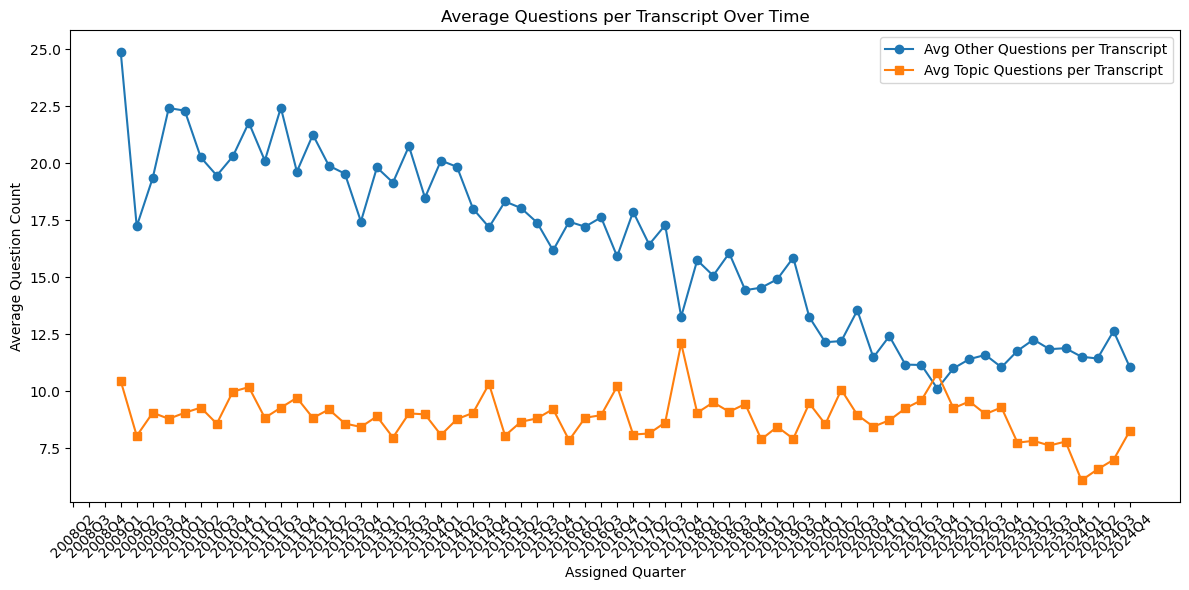

In [209]:
# df_vectorized["other_qs"] = df_vectorized["questions_vector"].apply(lambda x: x[-1])  # last element = 'other'
# df_vectorized["topic_qs"] = df_vectorized["questions_vector"].apply(lambda x: sum(x[:-1]))  # sum of all but 'other'

# # Group by quarter and compute averages
# grouped = df_vectorized.groupby("assigned_quarter")[["other_qs", "topic_qs"]].mean().sort_index()

# # Plot
# plt.figure(figsize=(12, 6))
# plt.plot(grouped.index, grouped["other_qs"], label="Avg Other Questions per Transcript", marker="o")
# plt.plot(grouped.index, grouped["topic_qs"], label="Avg Topic Questions per Transcript", marker="s")

# plt.xlabel("Assigned Quarter")
# plt.ylabel("Average Question Count")
# plt.title("Average Questions per Transcript Over Time")
# plt.xticks(rotation=45)
# # plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

In [248]:
inverted_topic_mapping = {v: k for k, v in topic_mapping.items()}

# Build new groupings
macroeconomic_mapping = {inverted_topic_mapping[t]: t for t in macroeconomic_terms if t in inverted_topic_mapping}
corporate_finance_mapping = {inverted_topic_mapping[t]: t for t in corporate_finance_terms if t in inverted_topic_mapping}
policy_mapping = {inverted_topic_mapping[t]: t for t in policy_terms if t in inverted_topic_mapping}
global_trends_mapping = {inverted_topic_mapping[t]: t for t in global_trends if t in inverted_topic_mapping}
business_trends_mapping = {inverted_topic_mapping[t]: t for t in business_trends_terms if t in inverted_topic_mapping}
other_mapping = {inverted_topic_mapping[t]: t for t in other if t in inverted_topic_mapping}


In [249]:
macroeconomic_mapping

{16: 'interest_rates',
 15: 'inflation',
 28: 'tariffs',
 7: 'currency_fluctuations_hedging',
 17: 'labor',
 5: 'commodity_price',
 6: 'consumer_demand'}

In [241]:
print("Vector index → Topic name:")
for i, topic_id in enumerate(macroeconomic_ids, 1):  # 1-based index
    print(f"{i}: {topic_mapping[topic_id]}")

Vector index → Topic name:
1: interest_rates
2: inflation
3: tariffs
4: currency_fluctuations_hedging
5: labor
6: commodity_price
7: consumer_demand


In [71]:
# reverse_mapping = {v: k for k, v in topic_mapping.items()}
# recurring_dict = {reverse_mapping[term]: term for term in recurring_terms if term in reverse_mapping}
# episodic_dict = {reverse_mapping[term]: term for term in episodic_terms if term in reverse_mapping}
# less_frequent_dict = {reverse_mapping[term]: term for term in less_frequent_terms if term in reverse_mapping}
# episodic_ids = [reverse_mapping[term] for term in episodic_terms if term in reverse_mapping]
# recurring_ids = [reverse_mapping[term] for term in recurring_terms if term in reverse_mapping]
# less_frequent_ids = [reverse_mapping[term] for term in less_frequent_terms if term in reverse_mapping]

# # Step 3: Define helper to extract vector slices
# def extract_vector(row, ids):
#     return [row["questions_vector"][i - 1] for i in ids]  # subtract 1 because list index is 0-based

# # Step 4: Apply to df_vectorized
# df_vectorized["episodic_vector"] = df_vectorized.apply(lambda row: extract_vector(row, episodic_ids), axis=1)
# df_vectorized["recurring_vector"] = df_vectorized.apply(lambda row: extract_vector(row, recurring_ids), axis=1)
# df_vectorized["less_frequent_vector"] = df_vectorized.apply(lambda row: extract_vector(row, less_frequent_ids), axis=1)


reverse_mapping = {v: k for k, v in topic_mapping.items()}

# # # Buckets with topic IDs
# recurring_ids_presentation = [reverse_mapping[term] for term in recurring_terms if term in reverse_mapping]
# episodic_ids_presentation = [reverse_mapping[term] for term in episodic_terms if term in reverse_mapping]
# less_frequent_ids_presentation = [reverse_mapping[term] for term in less_frequent_terms if term in reverse_mapping]

# # Mapping dictionaries if needed
# recurring_dict_presentation = {reverse_mapping[term]: term for term in recurring_terms if term in reverse_mapping}
# episodic_dict_presentation = {reverse_mapping[term]: term for term in episodic_terms if term in reverse_mapping}
# less_frequent_dict_presentation = {reverse_mapping[term]: term for term in less_frequent_terms if term in reverse_mapping}

# # Helper function to extract values by index
# def extract_presentation_vector(row, ids):
#     return [row["presentation_vector"][i - 1] for i in ids]  # Subtract 1 for 0-based index

# # Apply to create new columns
# df_vectorized["episodic_presentation_vector"] = df_vectorized.apply(lambda row: extract_presentation_vector(row, episodic_ids_presentation), axis=1)
# df_vectorized["recurring_presentation_vector"] = df_vectorized.apply(lambda row: extract_presentation_vector(row, recurring_ids_presentation), axis=1)
# df_vectorized["less_frequent_presentation_vector"] = df_vectorized.apply(lambda row: extract_presentation_vector(row, less_frequent_ids_presentation), axis=1)


In [234]:
macroeconomic_ids = [reverse_mapping[t] for t in macroeconomic_terms if t in reverse_mapping]
corporate_finance_ids = [reverse_mapping[t] for t in corporate_finance_terms if t in reverse_mapping]
policy_ids = [reverse_mapping[t] for t in policy_terms if t in reverse_mapping]
global_trends_ids = [reverse_mapping[t] for t in global_trends if t in reverse_mapping]
business_trends_ids = [reverse_mapping[t] for t in business_trends_terms if t in reverse_mapping]
other_ids = [reverse_mapping[t] for t in other if t in reverse_mapping]

macroeconomic_dict = {reverse_mapping[t]: t for t in macroeconomic_terms if t in reverse_mapping}
corporate_finance_dict = {reverse_mapping[t]: t for t in corporate_finance_terms if t in reverse_mapping}
policy_dict = {reverse_mapping[t]: t for t in policy_terms if t in reverse_mapping}
global_trends_dict = {reverse_mapping[t]: t for t in global_trends if t in reverse_mapping}
business_trends_dict = {reverse_mapping[t]: t for t in business_trends_terms if t in reverse_mapping}
other_dict = {reverse_mapping[t]: t for t in other if t in reverse_mapping}


def extract_presentation_vector(row, ids):
    vec = row.get("presentation_vector")
    if not isinstance(vec, list):
        return [np.nan] * len(ids)  # or [] if you'd rather drop the row later
    return [vec[i - 1] for i in ids]

def extract_question_vector(row, ids):
    vec = row.get("questions_vector")
    if not isinstance(vec, list):
        return [np.nan] * len(ids)  # or [] if you'd rather drop the row later
    return [vec[i - 1] for i in ids]



df_vectorized["macroeconomic_presentation_vector"] = df_vectorized.apply(
    lambda row: extract_presentation_vector(row, macroeconomic_ids), axis=1
)

df_vectorized["corporate_finance_presentation_vector"] = df_vectorized.apply(
    lambda row: extract_presentation_vector(row, corporate_finance_ids), axis=1
)

df_vectorized["policy_presentation_vector"] = df_vectorized.apply(
    lambda row: extract_presentation_vector(row, policy_ids), axis=1
)

df_vectorized["global_trends_presentation_vector"] = df_vectorized.apply(
    lambda row: extract_presentation_vector(row, global_trends_ids), axis=1
)

df_vectorized["business_trends_presentation_vector"] = df_vectorized.apply(
    lambda row: extract_presentation_vector(row, business_trends_ids), axis=1
)

# df_vectorized["other_vector"] = df_vectorized.apply(
#     lambda row: extract_presentation_vector(row, other_ids), axis=1
# )


df_vectorized["macroeconomic_vector"] = df_vectorized.apply(
    lambda row: extract_question_vector(row, macroeconomic_ids), axis=1
)

df_vectorized["corporate_finance_vector"] = df_vectorized.apply(
    lambda row: extract_question_vector(row, corporate_finance_ids), axis=1
)

df_vectorized["policy_vector"] = df_vectorized.apply(
    lambda row: extract_question_vector(row, policy_ids), axis=1
)

df_vectorized["global_trends_vector"] = df_vectorized.apply(
    lambda row: extract_question_vector(row, global_trends_ids), axis=1
)

df_vectorized["business_trends_vector"] = df_vectorized.apply(
    lambda row: extract_question_vector(row, business_trends_ids), axis=1
)

df_vectorized["other_vector"] = df_vectorized.apply(
    lambda row: extract_question_vector(row, other_ids), axis=1
)

print("Macroeconomic Terms:")
print(macroeconomic_terms)

print("\nreverse_mapping values for these:")
for t in macroeconomic_terms:
    print(f"{t}: {reverse_mapping.get(t)}")

print("\nmacroeconomic_ids:")
print(macroeconomic_ids)
print(f"Length: {len(macroeconomic_ids)}")


Macroeconomic Terms:
['interest_rates', 'inflation', 'tariffs', 'currency_fluctuations_hedging', 'labor', 'commodity_price', 'consumer_demand']

reverse_mapping values for these:
interest_rates: 16
inflation: 15
tariffs: 28
currency_fluctuations_hedging: 7
labor: 17
commodity_price: 5
consumer_demand: 6

macroeconomic_ids:
[16, 15, 28, 7, 17, 5, 6]
Length: 7


In [192]:
# df_vectorized = df_vectorized.drop( columns = ['corporate_finance_questions_vector'])
#        'business_trends_vector', 'macroeconomic_questions_vector',
#        'corporate_questions_finance_vector', 'policy_questions_vector',
#        'global_trends_questions_vector', 'business_trends_questions_vector',
#        'other_questions_vector'])

df_vectorized.columns

Index(['Unnamed: 0', 'ticker', 'year', 'quarter', 'date', 'content',
       'sector_name_mapped', 'group_name_mapped', 'ind_name_mapped',
       'subind_name_mapped', 'day_of_year', 'assigned_quarter',
       'presentation_vector', 'questions_vector', 'other_qs', 'topic_qs',
       'episodic_vector', 'recurring_vector', 'less_frequent_vector',
       'episodic_presentation_vector', 'recurring_presentation_vector',
       'less_frequent_presentation_vector', 'macroeconomic_vector',
       'corporate_finance_vector', 'policy_vector',
       'macroeconomic_presentation_vector',
       'corporate_finance_presentation_vector', 'policy_presentation_vector',
       'global_trends_presentation_vector',
       'business_trends_presentation_vector', 'other_vector',
       'global_trends_vector', 'business_trends_vector'],
      dtype='object')

In [166]:
df_vectorized['business_trends_vector'][30000]

[0, 2, 0, 0, 0, 0, 0, 1, 0, 0]

In [72]:
episodic_ordered = [term for term in episodic_terms if term in reverse_mapping]
recurring_ordered = [term for term in recurring_terms if term in reverse_mapping]
less_frequent_ordered = [term for term in less_frequent_terms if term in reverse_mapping]

# Build dictionaries with 1-based indices
episodic_vector_mapping = {i + 1: topic for i, topic in enumerate(episodic_ordered)}
recurring_vector_mapping = {i + 1: topic for i, topic in enumerate(recurring_ordered)}
less_frequent_vector_mapping = {i + 1: topic for i, topic in enumerate(less_frequent_ordered)}


In [48]:
# df_sample = df_vectorized[df_vectorized['sector_name_mapped'] == 'Consumer Discretionary']
# df_sample = df_sample[df_sample['group_name_mapped'] == 'Consumer Durables & Apparel']
# df_sample_2 = df_sample[df_sample['assigned_quarter'] == '2018Q3']

# df_sample = df_sample[df_sample['assigned_quarter'] == '2018Q4']

# print(df_sample[['ticker', 'episodic_presentation_vector']])
# print(df_sample_2[['ticker', 'episodic_presentation_vector']])

# df_vectorized[df_vectorized['ticker'] == 'LEN']['assigned_quarter'][60:120]
# df_vectorized = df_vectorized.drop_duplicates(subset=["ticker", "assigned_quarter"], keep="first")
df_vectorized['questions_vector'].apply(lambda x: not isinstance(x, list)).sum()


4219

In [212]:
column_means = {}

for col in df_enhanced.columns:
    try:
        column_means[col] = df_enhanced[col].astype(float).mean()
    except Exception:
        column_means[col] = "NA"

# If you want to see it as a DataFrame:
mean_df = pd.DataFrame.from_dict(column_means, orient="index", columns=["mean"])
mean_df[mean_df['mean'] == 0 



,mean
buyback_mentions_qna_answer_count,0.0
pandemic_mentions_qna_answer_count,0.0


In [60]:
# df_vectorized['questions_vector'][31275]
import ast
import numpy as np
def safe_parse_vector(val):
    if isinstance(val, str) and val.strip().startswith("["):
        try:
            return ast.literal_eval(val)
        except (ValueError, SyntaxError):
            return np.nan  # or [] if you prefer empty lists
    return np.nan  # or [] for consistency

# Apply safely

column_names = df_vectorized.columns[12:22]
column_names
for name in column_names: 
    df_vectorized[name] = df_vectorized[name].apply(safe_parse_vector)
# df_vectorized['episodic_vector'] = df_vectorized['episodic_vector'].apply(safe_parse_vector)

In [239]:
df_vectorized['macroeconomic_vector'][31279]

[0, 0, 1, 0, 0, 0, 0]


--- Debug: Filtered Tickers ---
['BLDR' 'HUBB' 'AXON' 'NDSN' 'GNRC' 'IR' 'IEX' 'WAB' 'HII' 'AOS' 'TDG'
 'URI' 'AME' 'PNR' 'XYL' 'TT' 'JCI' 'PWR' 'LHX' 'FAST' 'ROK' 'ITW' 'PH'
 'DOV' 'SNA' 'SWK' 'GWW' 'MAS' 'PCAR' 'TXT' 'CMI' 'EMR' 'BA' 'CAT' 'DE'
 'ETN' 'GD' 'GE' 'HON' 'LMT' 'MMM' 'NOC' 'RTX' 'FTV' 'ALLE' 'GEV' 'CARR'
 'OTIS' 'HWM']
Unique tickers: 49

--- Debug: Starting Term Loop ---
True
True
True
True
True
True
True
True
True
True
True


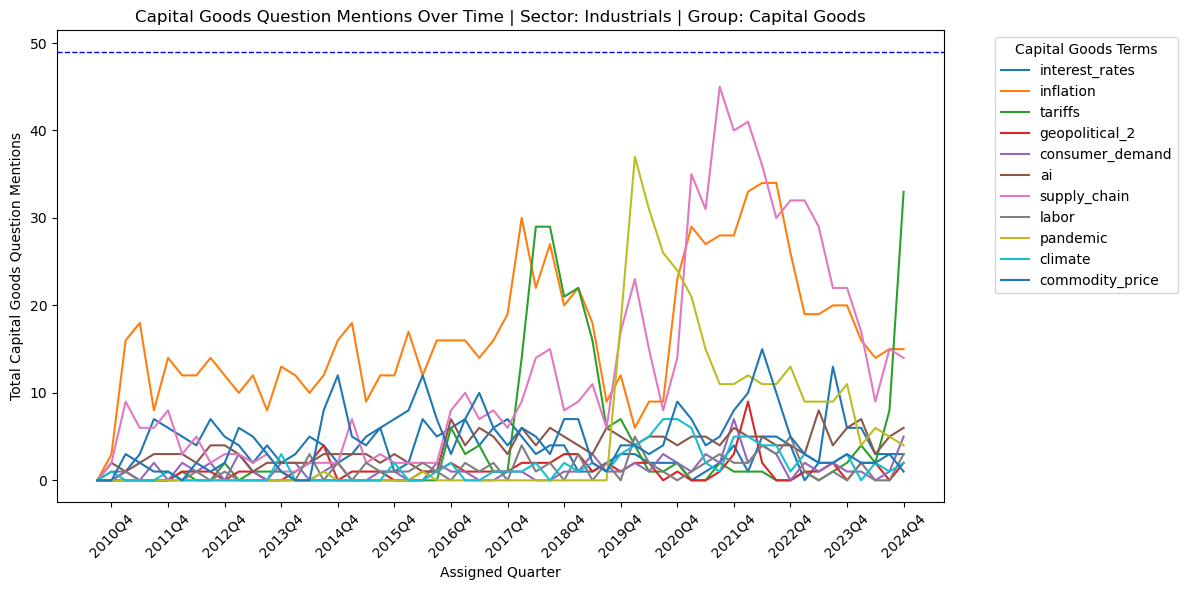

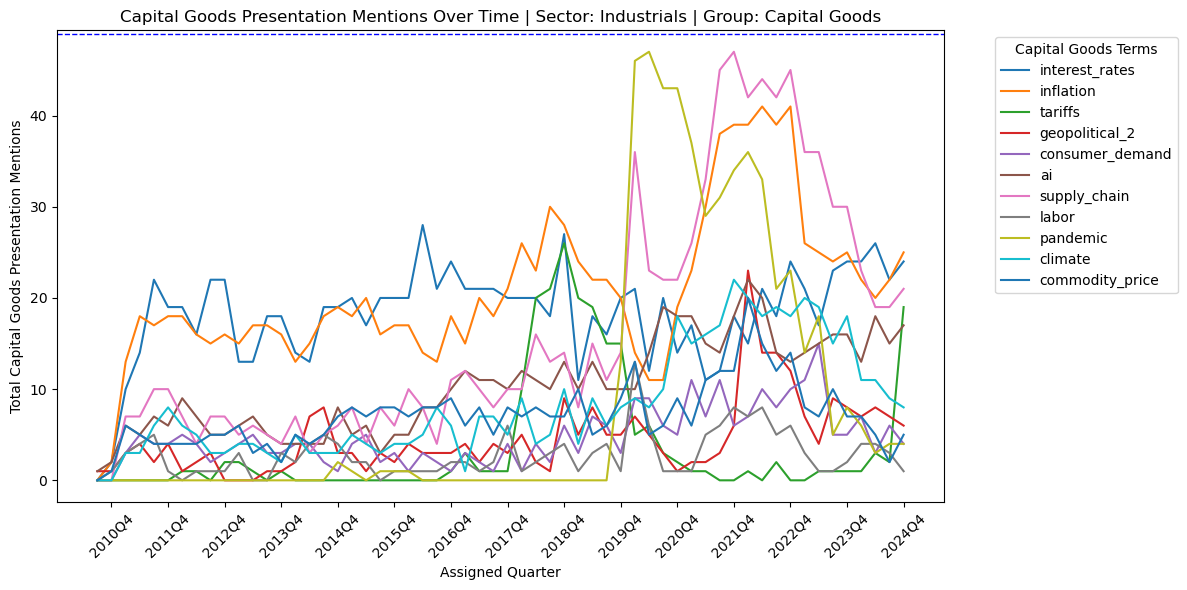

In [57]:
import matplotlib.pyplot as plt

def plot_topic_mentions(
    df,
    vector_name,
    vector_mapping,
    label_prefix="Episodic",
    sector=None,
    group=None,
    ticker=None,
    start_year=2011,
    topic = None,
    summation=False
):
    # Filter
    df_filtered = df[df["year"] >= start_year]

    if sector:
        df_filtered = df_filtered[df_filtered["sector_name_mapped"] == sector]
    if group:
        df_filtered = df_filtered[df_filtered["group_name_mapped"] == group]
    if ticker:
        df_filtered = df_filtered[df_filtered["ticker"] == ticker]

    print("\n--- Debug: Filtered Tickers ---")
    print(df_filtered['ticker'].unique())
    unique_tickers = df_filtered['ticker'].nunique()
    print(f"Unique tickers: {unique_tickers}")

    # Sort and set up index
    df_filtered = df_filtered.sort_values("assigned_quarter")
    unique_quarters = sorted(df_filtered["assigned_quarter"].unique())
    trends_qna = pd.DataFrame(index=unique_quarters)
    trends_pres = pd.DataFrame(index=unique_quarters)

    print("\n--- Debug: Starting Term Loop ---")
    for idx, term in vector_mapping.items():
        # print(f"Processing term '{term}' at vector index {idx}...")

        try:
            if summation:
                trends_qna[term] = df_filtered.groupby("assigned_quarter")[vector_name].apply(
                    lambda vecs: sum(vec[idx - 1] for vec in vecs if isinstance(vec, list) and len(vec) > (idx - 1))
                )
                trends_pres[term] = df_filtered.groupby("assigned_quarter")[f"{vector_name.replace('_vector', '_presentation_vector')}"].apply(
                    lambda vecs: sum(vec[idx - 1] for vec in vecs if isinstance(vec, list) and len(vec) > (idx - 1))
                )
            else:
                trends_qna[term] = df_filtered.groupby("assigned_quarter")[vector_name].apply(
                    lambda vecs: sum(1 for vec in vecs if isinstance(vec, list) and len(vec) > (idx - 1) and vec[idx - 1] > 0)
                )
                trends_pres[term] = df_filtered.groupby("assigned_quarter")[f"{vector_name.replace('_vector', '_presentation_vector')}"].apply(
                    lambda vecs: sum(1 for vec in vecs if isinstance(vec, list) and len(vec) > (idx - 1) and vec[idx - 1] > 0)
                )
        except Exception as e:
            print(f"⚠️ Error processing term '{term}' at index {idx}: {e}")


    # Plot Q&A
    plt.figure(figsize=(12, 6))
    if topic == None:
        for term in trends_qna.columns:
            plt.plot(trends_qna.index, trends_qna[term], label=term)
            print("True")
    else:
        plt.plot(trends_qna.index, trends_qna[topic], label=topic)
    plt.xlabel("Assigned Quarter")
    plt.ylabel(f"Total {label_prefix} Question Mentions")
    title = f"{label_prefix} Question Mentions Over Time"
    if sector: title += f" | Sector: {sector}"
    if group: title += f" | Group: {group}"
    if ticker: title += f" | Ticker: {ticker}"
    plt.title(title)

    q4_labels = [q for q in trends_qna.index if q.endswith("Q4")]
    plt.xticks(ticks=q4_labels, labels=q4_labels, rotation=45)
    plt.axhline(y=unique_tickers, color='blue', linestyle='--', linewidth=1)
    plt.legend(title=f"{label_prefix} Terms", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Plot Presentation
    plt.figure(figsize=(12, 6))
    for term in trends_pres.columns:
        plt.plot(trends_pres.index, trends_pres[term], label=term)

    plt.xlabel("Assigned Quarter")
    plt.ylabel(f"Total {label_prefix} Presentation Mentions")
    plt.title(title.replace("Question", "Presentation"))
    plt.xticks(ticks=q4_labels, labels=q4_labels, rotation=45)
    plt.axhline(y=unique_tickers, color='blue', linestyle='--', linewidth=1)
    plt.legend(title=f"{label_prefix} Terms", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


sector = "Industrials"
groups = df_vectorized[df_vectorized['sector_name_mapped'] == sector]['group_name_mapped'].unique()
# tickers = df_vectorized[df_vectorized['group_name_mapped'] == groups[0]]['ticker'].unique()
group = groups[0]
# print(group)
# group = groups[0]
# ticker = 'KR'
# tickers = df_vectorized[df_vectorized['group_name_mapped'] == group]['ticker'].unique()

# for group in groups:

# for num in [1, 2, 3]:
plot_topic_mentions(
    # df=df_vectorized[df_vectorized['market_cap_tercile'] == num],
    df = df_vectorized,
    vector_name="episodic_vector",
    vector_mapping=episodic_mapping,
    # label_prefix = f"Percentile: {num}",
    label_prefix = 'Capital Goods',
    sector= sector ,
    group= group,
    topic = None,
    # ticker = ticker,
    summation=False  # or False
)




# plot_episodic_mentions(
#     df=df_vectorized,
#     episodic_vector_mapping=episodic_vector_mapping,
#     ticker="WMT"
# )



In [42]:
df_vectorized[df_vectorized['market_cap_tercile'] == 1]

,Unnamed: 0.1,Unnamed: 0,ticker,year,quarter,date,content,sector_name_mapped,group_name_mapped,ind_name_mapped,...,corporate_finance_presentation_vector,policy_presentation_vector,global_trends_presentation_vector,business_trends_presentation_vector,other_vector,global_trends_vector,business_trends_vector,mkvaltq,mkvaltq_percentile,market_cap_tercile
16,16,16,DELL,2009,4,2010-01-26 15:55:12,"Executives: Joseph M. Tucci - Chairman, Chief ...",Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25245.3000,0.740741,1.0
3001,3001,3088,HD,2009,4,2010-02-23 14:10:21,Executives: Diane Dayhoff - VP and IR Frank Bl...,Consumer Discretionary,Consumer Discretionary Distribution & Retail,Specialty Retail,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47560.9800,0.851852,1.0
3161,3161,3248,LOW,2009,4,2010-02-22 14:54:08,Executives: Robert Niblock - Chairman and CEO ...,Consumer Discretionary,Consumer Discretionary Distribution & Retail,Specialty Retail,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31587.3500,0.777778,1.0
3365,3365,3458,TGT,2009,4,2010-02-23 13:09:09,"Executives: Gregg Steinhafel - Chairman, Presi...",Consumer Staples,Consumer Staples Distribution & Retail,Consumer Staples Distribution & Retail,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38177.8979,0.814815,1.0
4225,4225,4336,DELL,2010,1,2010-04-21 14:34:12,Executives: Tony Takazawa Joe Tucci - Chairman...,Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals",...,"[0, 0, 0, 1, 20, 10, 6]","[0.0, 5]","[0, 0, 13]","[2, 2, 0, 2, 1, 0, 2, 0, 0, 2]",[15.0],"[0.0, 0, 0]","[1, 0, 0, 2, 0, 0, 1, 0, 0, 0]",31671.0000,0.783019,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31273,31273,36189,RTX,2024,4,2025-01-28 08:30:00,"Operator: Good day, ladies and gentlemen, and ...",Industrials,Capital Goods,Aerospace & Defense,...,"[1, 0, 2, 6, 20, 26, 0]","[0.0, 1]","[0, 0, 9]","[3, 0, 0, 1, 4, 0, 3, 0, 1, 3]",[9.0],"[1.0, 0, 0]","[0, 0, 0, 2, 0, 0, 0, 0, 1, 0]",154153.2736,0.882227,1.0
31275,31275,36191,SO,2024,4,2025-02-20 13:00:00,"Operator: Good afternoon. My name is Robert, a...",Utilities,Utilities,Electric Utilities,...,"[0, 7, 2, 2, 0, 0, 0]","[0.0, 4]","[0, 1, 0]","[4, 0, 1, 12, 0, 1, 4, 0, 0, 0]",[15.0],"[0.0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",90305.0400,0.792291,1.0
31276,31276,36192,SPGI,2024,4,2025-02-11 08:30:00,"Operator: Good morning, and welcome to S&P Glo...",Financials,Financial Services,Capital Markets,...,"[4, 4, 1, 10, 21, 38, 0]","[0.0, 1]","[0, 1, 4]","[1, 4, 1, 10, 8, 1, 1, 0, 0, 0]",[11.0],"[0.0, 0, 1]","[2, 0, 0, 2, 1, 0, 2, 0, 0, 0]",153293.6340,0.880086,1.0
31277,31277,36193,UNP,2024,4,2025-01-23 08:45:00,"Operator: Greetings, welcome to Union Pacific'...",Industrials,Transportation,Ground Transportation,...,"[0, 3, 2, 8, 2, 14, 1]","[0.0, 1]","[0, 0, 0]","[0, 1, 0, 2, 0, 0, 0, 0, 1, 0]",[10.0],"[1.0, 0, 0]","[0, 1, 0, 2, 0, 0, 0, 0, 0, 0]",137791.1176,0.856531,1.0


In [255]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_topic_totals(
    df,
    vector_name,           # e.g. "macroeconomic_vector"
    vector_mapping,        # e.g. macroeconomic_mapping
    label_prefix="Topics",
    start_year=2011
):
    # Filter for valid years
    df_filtered = df[df["year"] >= start_year].copy()
    df_filtered = df_filtered.sort_values("assigned_quarter")
    unique_quarters = sorted(df_filtered["assigned_quarter"].unique())

    # Initialize totals
    trends_sum = pd.DataFrame(index=unique_quarters)
    trends_nonzero = pd.DataFrame(index=unique_quarters)

    print(f"\n=== Plotting '{vector_name}' with {len(vector_mapping)} terms ===")

    for idx, term in vector_mapping.items():
        print(f"Processing term '{term}' at vector index {idx}...")

        # Sum of values at index
        trends_sum[term] = df_filtered.groupby("assigned_quarter")[vector_name].apply(
            lambda vecs: sum(
                vec[idx - 1]
                for vec in vecs
                if isinstance(vec, list) and len(vec) > (idx - 1)
            )
        )

        # Count of non-zero values at index
        trends_nonzero[term] = df_filtered.groupby("assigned_quarter")[vector_name].apply(
            lambda vecs: sum(
                1
                for vec in vecs
                if isinstance(vec, list) and len(vec) > (idx - 1) and vec[idx - 1] > 0
            )
        )

    # Plot: Total Sum
    plt.figure(figsize=(12, 6))
    for term in trends_sum.columns:
        plt.plot(trends_sum.index, trends_sum[term], label=term)

    plt.xlabel("Assigned Quarter")
    plt.ylabel(f"Total Magnitude of {label_prefix} Mentions")
    plt.title(f"{label_prefix} — Total Magnitude Over Time")
    plt.xticks(rotation=45)
    plt.legend(title=f"{label_prefix}", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot: Non-Zero Counts
    plt.figure(figsize=(12, 6))
    for term in trends_nonzero.columns:
        plt.plot(trends_nonzero.index, trends_nonzero[term], label=term)

    plt.xlabel("Assigned Quarter")
    plt.ylabel(f"Total # of {label_prefix} Mentions (nonzero)")
    plt.title(f"{label_prefix} — Count of Mentions Over Time")
    plt.xticks(rotation=45)
    plt.legend(title=f"{label_prefix}", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()




=== Processing Group: Macroeconomic ===

=== Processing Group: Corporate Finance ===

=== Processing Group: Policy ===

=== Processing Group: Global Trends ===

=== Processing Group: Business Trends ===

=== Processing Group: Other ===


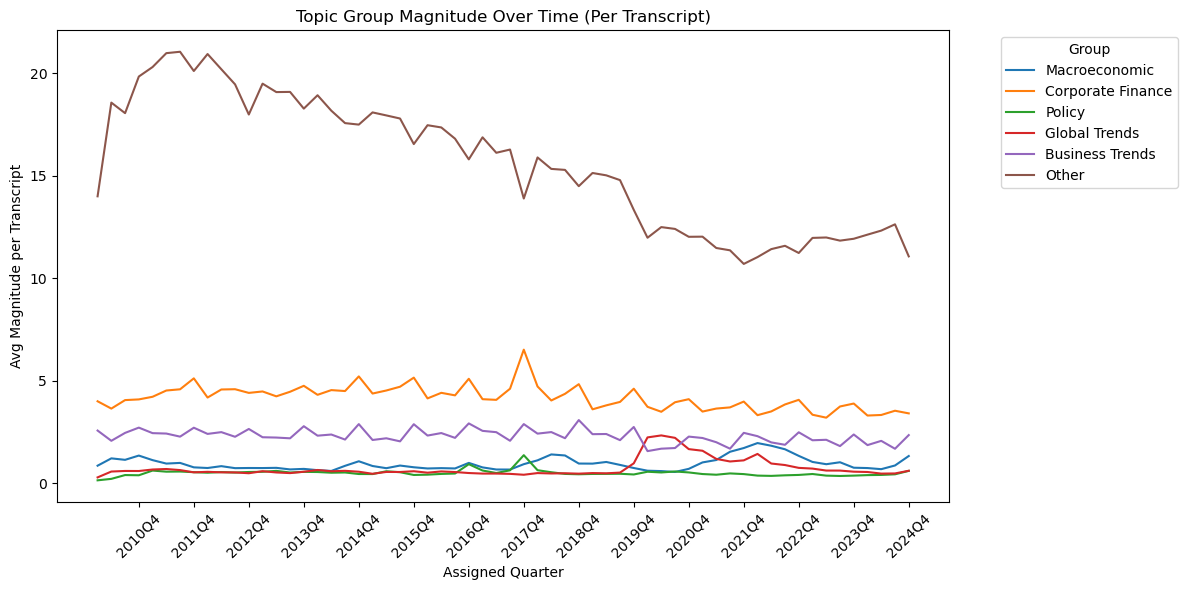

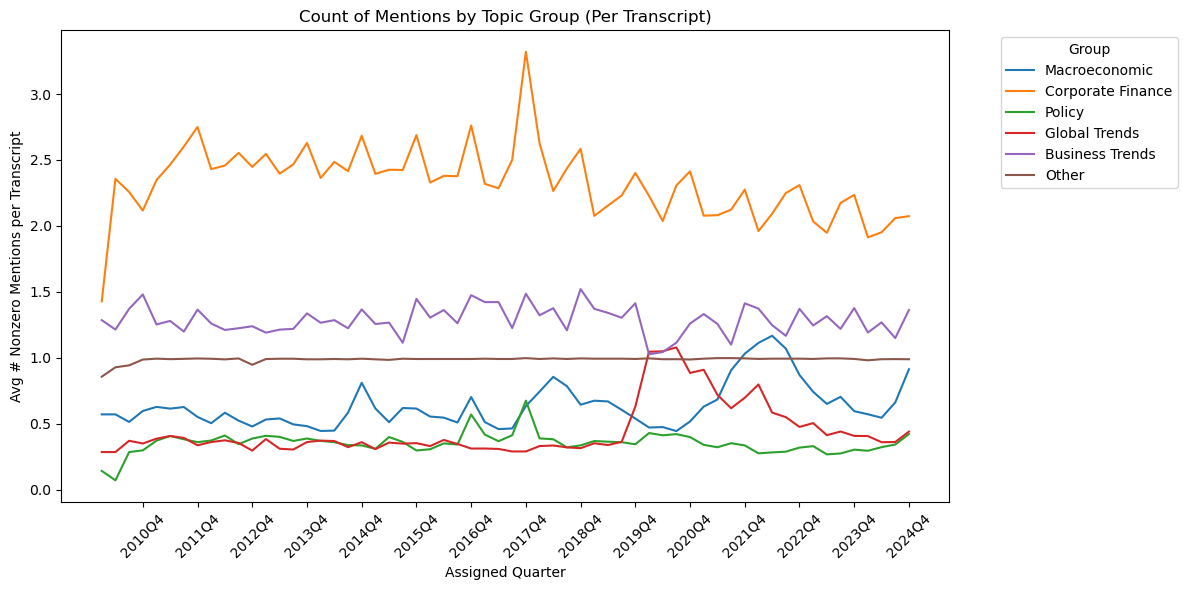

In [260]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_topic_group_totals(
    df,
    group_vectors,
    start_year=2011
):
    df_filtered = df[df["year"] >= start_year].copy()
    df_filtered = df_filtered.sort_values("assigned_quarter")
    unique_quarters = sorted(df_filtered["assigned_quarter"].unique())

    # Get transcript count per quarter
    transcripts_per_quarter = df_filtered.groupby("assigned_quarter").size()

    trends_sum = pd.DataFrame(index=unique_quarters)
    trends_nonzero = pd.DataFrame(index=unique_quarters)

    for group_label, (vector_name, vector_mapping) in group_vectors.items():
        print(f"\n=== Processing Group: {group_label} ===")

        # Total sum (normalized per transcript)
        raw_sum = df_filtered.groupby("assigned_quarter")[vector_name].apply(
            lambda vecs: sum(
                sum(vec[i - 1] for i in vector_mapping.keys()
                    if isinstance(vec, list) and len(vec) > (i - 1))
                for vec in vecs
            )
        )
        trends_sum[group_label] = raw_sum / transcripts_per_quarter

        # Non-zero count (normalized per transcript)
        raw_nonzero = df_filtered.groupby("assigned_quarter")[vector_name].apply(
            lambda vecs: sum(
                sum(1 for i in vector_mapping.keys()
                    if isinstance(vec, list) and len(vec) > (i - 1) and vec[i - 1] > 0)
                for vec in vecs
            )
        )
        trends_nonzero[group_label] = raw_nonzero / transcripts_per_quarter

    # === Plot: Total Magnitude ===
    plt.figure(figsize=(12, 6))
    for col in trends_sum.columns:
        plt.plot(trends_sum.index, trends_sum[col], label=col)

    q4_labels = [q for q in trends_sum.index if q.endswith("Q4")]

    plt.xlabel("Assigned Quarter")
    plt.ylabel("Avg Magnitude per Transcript")
    plt.title("Topic Group Magnitude Over Time (Per Transcript)")
    plt.xticks(ticks=q4_labels, labels=q4_labels, rotation=45)
    plt.legend(title="Group", loc='upper left', bbox_to_anchor=(1.05, 1))
    # plt.grid(True)
    plt.tight_layout()
    plt.show()

    # === Plot: Nonzero Count ===
    plt.figure(figsize=(12, 6))
    for col in trends_nonzero.columns:
        plt.plot(trends_nonzero.index, trends_nonzero[col], label=col)

    plt.xlabel("Assigned Quarter")
    plt.ylabel("Avg # Nonzero Mentions per Transcript")
    plt.title("Count of Mentions by Topic Group (Per Transcript)")
    plt.xticks(ticks=q4_labels, labels=q4_labels, rotation=45)
    plt.legend(title="Group", loc='upper left', bbox_to_anchor=(1.05, 1))
    # plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_topic_group_totals(
    df=df_vectorized,
    group_vectors={
        "Macroeconomic": ("macroeconomic_vector", macroeconomic_mapping),
        "Corporate Finance": ("corporate_finance_vector", corporate_finance_mapping),
        "Policy": ("policy_vector", policy_mapping),
        "Global Trends": ("global_trends_vector", global_trends_mapping),
        "Business Trends": ("business_trends_vector", business_trends_mapping),
        "Other": ("other_vector", other_mapping),
    }
)

In [84]:
group = "Capital Goods"
df_industrials = df_returns[df_returns['group_name_mapped'] == group]

# print(df_industrials)

df_industrials_2017 = df_industrials[
    (df_industrials['quarter'] == '2017Q1') |
    (df_industrials['quarter'] == '2017Q2') |
    (df_industrials['quarter'] == '2017Q3')
]

df_industrials_2018 = df_industrials[
    (df_industrials['quarter'] == '2017Q4') |
    (df_industrials['quarter'] == '2018Q1') |
    (df_industrials['quarter'] == '2018Q2')
]
# df_industrials_2018

Skipping 2010Q1 — fewer than 2 complete tickers.


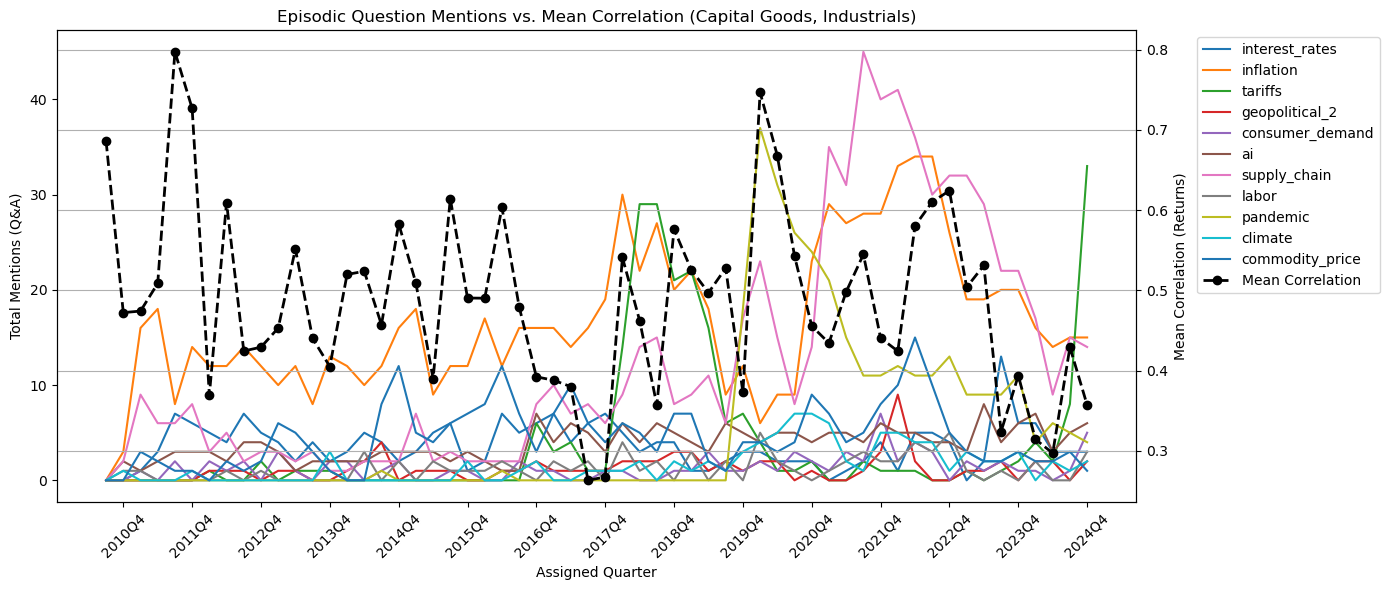

In [73]:
mean_corr_cap_goods = compute_mean_correlation_per_quarter(df_cap_goods, plot=False)

# Step 2: Generate topic trends using existing function logic (Q&A only)
def get_topic_mention_trends(df, vector_name, vector_mapping, topic=None):
    df_filtered = df.sort_values("assigned_quarter")
    unique_quarters = sorted(df_filtered["assigned_quarter"].unique())
    trends_qna = pd.DataFrame(index=unique_quarters)

    for idx, term in vector_mapping.items():
        if topic and term != topic:
            continue
        trends_qna[term] = df_filtered.groupby("assigned_quarter")[vector_name].apply(
            lambda vecs: sum(1 for vec in vecs if isinstance(vec, list) and len(vec) > (idx - 1) and vec[idx - 1] > 0)
        )
    return trends_qna

# Filter df_vectorized for relevant group
df_filtered = df_vectorized[
    (df_vectorized["group_name_mapped"] == "Capital Goods") &
    (df_vectorized["sector_name_mapped"] == "Industrials") &
    (df_vectorized["year"] >= 2011)
]

# Step 3: Get trends for all episodic topics
topic_trends = get_topic_mention_trends(df_filtered, "episodic_vector", episodic_vector_mapping)

# Step 4: Align with correlation data
combined = topic_trends.join(mean_corr_cap_goods, how='inner')

# Step 5: Plot — left y-axis = mentions, right y-axis = correlation
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot all episodic topic mentions
for col in topic_trends.columns:
    ax1.plot(combined.index, combined[col], label=col)
ax1.set_xlabel("Assigned Quarter")
ax1.set_ylabel("Total Mentions (Q&A)")
ax1.tick_params(axis='y')
ax1.set_xticks([q for q in combined.index if q.endswith("Q4")])
ax1.set_xticklabels([q for q in combined.index if q.endswith("Q4")], rotation=45)

# Twin y-axis for correlation
ax2 = ax1.twinx()
ax2.plot(combined.index, combined["mean_correlation"], color='black', marker='o', linewidth=2, linestyle='--', label='Mean Correlation')
ax2.set_ylabel("Mean Correlation (Returns)")
ax2.tick_params(axis='y', labelcolor='black')

# Legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Episodic Question Mentions vs. Mean Correlation (Capital Goods, Industrials)")
plt.tight_layout()
plt.grid(True)
plt.show()

Skipping 2010Q1 — fewer than 2 complete tickers.


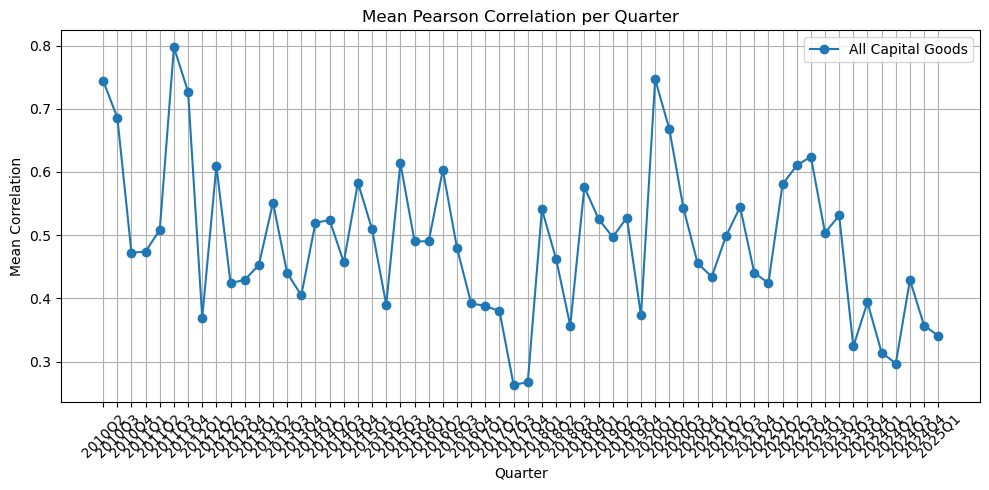

In [65]:
def compute_mean_correlation_per_quarter(df, plot=True):
    """
    Compute mean pairwise Pearson correlation of stock daily log returns within each quarter.

    Parameters:
        df (pd.DataFrame): DataFrame with columns ['quarter', 'Date', 'ticker', 'Daily Log Return']
        plot (bool): Whether to show a line plot of mean correlations per quarter

    Returns:
        pd.DataFrame: DataFrame with mean Pearson correlation per quarter
    """
    quarters = sorted(df['quarter'].unique())
    mean_corr_by_quarter = {}

    for q in quarters:
        df_q = df[df['quarter'] == q]

        # Pivot to date x ticker matrix
        pivot = df_q.pivot(index='Date', columns='ticker', values='Daily Log Return').dropna(axis=1, how='any')
        if pivot.shape[1] < 2:
            print(f"Skipping {q} — fewer than 2 complete tickers.")
            continue

        corr_matrix = pivot.corr()  # Pearson correlation across tickers
        corr_vals = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        mean_corr = corr_vals.stack().mean()
        mean_corr_by_quarter[q] = mean_corr

    mean_corr_df = pd.DataFrame.from_dict(mean_corr_by_quarter, orient='index', columns=['mean_correlation'])
    mean_corr_df = mean_corr_df.sort_index()

    if plot:
        mean_corr_df.plot(marker='o', legend=False, title='Mean Pairwise Correlation per Quarter')
        plt.ylabel('Mean Correlation')
        plt.xlabel('Quarter')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()

    return mean_corr_df



df_cap_goods = df_returns[df_returns['group_name_mapped'] == 'Capital Goods']
# mean_sim_industrials = compute_mean_correlation_per_quarter(df_cap_goods, plot=False)
# df_high_tariffs = df_industrials[df_industrials['ticker'].isin(tickers_both)]
# mean_sim_high_tariffs = compute_mean_cosine_similarity_per_quarter(df_high_tariffs, plot=False)
# print(mean_sim_high_tariffs)
# print(mean_sim_industrials)

mean_corr_cap_goods = compute_mean_correlation_per_quarter(df_cap_goods, plot=False)

plt.figure(figsize=(10, 5))
plt.plot(mean_corr_cap_goods.index, mean_corr_cap_goods['mean_correlation'], marker='o', label='All Capital Goods')

plt.title('Mean Pearson Correlation per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Mean Correlation')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [106]:
df_mean_cos = compute_mean_cosine_similarity_per_quarter(df_returns, plot = False)

Skipping 2010Q1 — fewer than 2 complete tickers.
Skipping NaT — fewer than 2 complete tickers.


/tmp/ipykernel_3449231/1607492888.py:27: FutureWarning: The behavior of Index.insert with object-dtype is deprecated, in a future version this will return an object-dtype Index instead of inferring a non-object dtype. To retain the old behavior, do `idx.insert(loc, item).infer_objects(copy=False)`
  pivot = df_q.pivot(index='Date', columns='ticker', values='Daily Log Return').dropna(axis=1, how='any')
/tmp/ipykernel_3449231/1607492888.py:27: FutureWarning: The behavior of Index.insert with object-dtype is deprecated, in a future version this will return an object-dtype Index instead of inferring a non-object dtype. To retain the old behavior, do `idx.insert(loc, item).infer_objects(copy=False)`
  pivot = df_q.pivot(index='Date', columns='ticker', values='Daily Log Return').dropna(axis=1, how='any')


In [113]:
def compute_mean_similarity_per_ticker(df_returns, method='correlation'):
    """
    Computes the mean similarity of each ticker to all others in the same quarter,
    using either correlation or cosine similarity.

    Parameters:
        df_returns (DataFrame): Must contain ['Date', 'ticker', 'quarter', 'Daily Log Return']
        method (str): 'correlation' or 'cosine'

    Returns:
        DataFrame: ['ticker', 'quarter', 'mean_similarity_to_peers']
    """
    result = []

    quarters = sorted(df_returns['quarter'].unique())

    for q in quarters:
        df_q = df_returns[df_returns['quarter'] == q]

        # Pivot to date x ticker matrix
        pivot = df_q.pivot(index='Date', columns='ticker', values='Daily Log Return')
        pivot = pivot.dropna(axis=1, how='any')  # remove tickers with missing data

        if pivot.shape[1] < 2:
            continue  # skip if fewer than 2 tickers

        # Transpose so rows = tickers, columns = returns
        X = pivot.T

        if method == 'correlation':
            sim_matrix = X.T.corr().values  # pandas correlation
        elif method == 'cosine':
            sim_matrix = cosine_similarity(X)
        else:
            raise ValueError("method must be 'correlation' or 'cosine'")

        tickers = X.index.tolist()

        for i, ticker in enumerate(tickers):
            # Exclude self-similarity (diagonal = 1)
            others = np.delete(sim_matrix[i], i)
            mean_sim = np.mean(others)
            result.append({'ticker': ticker, 'quarter': q, 'mean_similarity_to_peers': mean_sim})

    return pd.DataFrame(result)

df_mean_cos_new = compute_mean_similarity_per_ticker(df_returns, method='correlation')


/tmp/ipykernel_3449231/3966552631.py:21: FutureWarning: The behavior of Index.insert with object-dtype is deprecated, in a future version this will return an object-dtype Index instead of inferring a non-object dtype. To retain the old behavior, do `idx.insert(loc, item).infer_objects(copy=False)`
  pivot = df_q.pivot(index='Date', columns='ticker', values='Daily Log Return')
/tmp/ipykernel_3449231/3966552631.py:21: FutureWarning: The behavior of Index.insert with object-dtype is deprecated, in a future version this will return an object-dtype Index instead of inferring a non-object dtype. To retain the old behavior, do `idx.insert(loc, item).infer_objects(copy=False)`
  pivot = df_q.pivot(index='Date', columns='ticker', values='Daily Log Return')


In [116]:
df_mean_cos_new

,ticker,quarter,mean_similarity_to_peers
0,A,2010Q2,0.672306
1,AAPL,2010Q2,0.580759
2,ABT,2010Q2,0.550305
3,ACGL,2010Q2,0.621362
4,ACN,2010Q2,0.540276
...,...,...,...
28059,XYL,2025Q1,0.296447
28060,YUM,2025Q1,0.160784
28061,ZBH,2025Q1,0.121925
28062,ZBRA,2025Q1,0.193725


In [121]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
# Make sure all episodic vectors are the same length
max_dim = max(len(vec) for vec in df_vectorized['episodic_presentation_vector'])

df_vectorized['episodic_presentation_vector'] = df_vectorized['episodic_presentation_vector'].apply(
    lambda x: x + [0] * (max_dim - len(x))
)

# Expand vectors into separate columns
episodic_df = pd.DataFrame(df_vectorized['episodic_presentation_vector'].tolist(), index=df_vectorized.index)
episodic_df.columns = [f'episodic_vector_{i+1}' for i in range(max_dim)]

# Merge with original DataFrame
df_expanded = pd.concat([df_vectorized.drop(columns=['episodic_presentation_vector']), episodic_df], axis=1)

# Merge with target variable
df_merged = df_expanded.merge(df_mean_cos_new, on='ticker')

# ✅ Apply episodic_mapping only
rename_map = {f'episodic_vector_{k}': v for k, v in episodic_mapping.items()}
X = df_merged[[col for col in df_merged.columns if col.startswith('episodic_vector_')]]
X = X.rename(columns=rename_map)

# Add constant
X = sm.add_constant(X)

# Target variable
y = df_merged['mean_similarity_to_peers']

# Run regression
model = sm.OLS(y, X).fit()
print(model.summary())


                               OLS Regression Results                               
Dep. Variable:     mean_similarity_to_peers   R-squared:                       0.007
Model:                                  OLS   Adj. R-squared:                  0.007
Method:                       Least Squares   F-statistic:                     1096.
Date:                      Sun, 23 Mar 2025   Prob (F-statistic):               0.00
Time:                              15:56:17   Log-Likelihood:             7.8801e+05
No. Observations:                   1818238   AIC:                        -1.576e+06
Df Residuals:                       1818226   BIC:                        -1.576e+06
Df Model:                                11                                         
Covariance Type:                  nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [78]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def cluster_stock_returns(df, n_clusters=4, date_col='Date', ticker_col='ticker', return_col='Daily Log Return'):

    # Step 1: Clean and pivot
    df_clean = df.dropna(subset=[return_col])
    returns_matrix = df_clean.pivot(index=date_col, columns=ticker_col, values=return_col)
    
    # Drop incomplete data
    returns_matrix = returns_matrix.dropna(axis=1, how='any')  # drop tickers with any NA
    returns_matrix = returns_matrix.dropna(axis=0, how='all')  # drop days with all NA
    
    if returns_matrix.shape[1] < n_clusters:
        raise ValueError("Fewer tickers than clusters — reduce n_clusters or check data.")
    
    # Prepare matrix for clustering
    X = returns_matrix.T
    X_scaled = StandardScaler().fit_transform(X)

    # === HIERARCHICAL CLUSTERING ===
    # Z = linkage(X, method='ward')
    # hier_labels = fcluster(Z, t=n_clusters, criterion='maxclust')

    # Plot dendrogram
    # plt.figure(figsize=(10, 6))
    # dendrogram(Z, labels=X.index, color_threshold=None)
    # plt.title(f"Hierarchical Clustering (Ward, {n_clusters} Clusters)")
    # plt.ylabel("Distance")
    # plt.xticks(rotation=90)
    # plt.tight_layout()
    # plt.show()

    # Save hierarchical labels
    # hier_clusters = pd.DataFrame({ticker_col: X.index, 'hierarchical_cluster': hier_labels})

    # === K-MEANS CLUSTERING ===
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    kmeans_clusters = pd.DataFrame({ticker_col: X.index, 'kmeans_cluster': kmeans_labels + 1})

    # === Combine and return ===
    cluster_df =kmeans_clusters

    return cluster_df


clustered_2017 = cluster_stock_returns(df_industrials_2017, n_clusters=8)
clustered_2018 = cluster_stock_returns(df_industrials_2018, n_clusters=8)

# print(clustered_2017)
# print(clustered_2018)
print("Cluster counts for 2017:")
print(clustered_2017['kmeans_cluster'].value_counts().sort_index())
print()

print("Cluster counts for 2018:")
print(clustered_2018['kmeans_cluster'].value_counts().sort_index())


Cluster counts for 2017:
kmeans_cluster
1     1
2     3
3    10
4     9
5     2
6    18
7     1
8     1
Name: count, dtype: int64

Cluster counts for 2018:
kmeans_cluster
1     2
2     8
3     1
4     5
5     2
6    26
7     1
8     1
Name: count, dtype: int64


In [66]:
common_2017 = clustered_2017[clustered_2017['ticker'].isin(tickers_both)]
control_2017 = clustered_2017[~clustered_2017['ticker'].isin(tickers_both)]

common_2018 = clustered_2018[clustered_2018['ticker'].isin(tickers_both)]
control_2018 = clustered_2018[~clustered_2018['ticker'].isin(tickers_both)]

# Cluster distributions
dist_common_2017 = common_2017['kmeans_cluster'].value_counts().sort_index()
dist_control_2017 = control_2017['kmeans_cluster'].value_counts().sort_index()

dist_common_2018 = common_2018['kmeans_cluster'].value_counts().sort_index()
dist_control_2018 = control_2018['kmeans_cluster'].value_counts().sort_index()

# Print results
print("Cluster distribution for shared tickers in 2017:")
print(dist_common_2017)

print("\nCluster distribution for control group in 2017:")
print(dist_control_2017)

print("\nCluster distribution for shared tickers in 2018:")
print(dist_common_2018)

print("\nCluster distribution for control group in 2018:")
print(dist_control_2018)

Cluster distribution for shared tickers in 2017:
kmeans_cluster
1    1
2    2
4    1
6    6
8    3
Name: count, dtype: int64

Cluster distribution for control group in 2017:
kmeans_cluster
2    17
3     3
4     1
5     4
6    20
7     1
8     9
Name: count, dtype: int64

Cluster distribution for shared tickers in 2018:
kmeans_cluster
1     1
6    13
Name: count, dtype: int64

Cluster distribution for control group in 2018:
kmeans_cluster
2     2
3     1
4     1
5     3
6    42
7     1
8     5
Name: count, dtype: int64


In [266]:
def tickers_with_mentions(
    df,
    topic="tariffs",
    vector_col="questions_vector",
    start_quarter=None,
    end_quarter=None
):
    # Get topic index (0-based)
    reverse_mapping = {v: k for k, v in topic_mapping.items()}
    if topic not in reverse_mapping:
        raise ValueError(f"Topic '{topic}' not found in topic_mapping.")
    idx = reverse_mapping[topic] - 1

    # Filter by quarter
    df_filtered = df.copy()
    if start_quarter:
        df_filtered = df_filtered[df_filtered["assigned_quarter"] >= start_quarter]
    if end_quarter:
        df_filtered = df_filtered[df_filtered["assigned_quarter"] <= end_quarter]

    # Find rows with > 0 mentions
    has_mention = df_filtered[vector_col].apply(
        lambda vec: isinstance(vec, list) and len(vec) > idx and vec[idx] > 0
    )

    tickers = df_filtered.loc[has_mention, "ticker"].unique()
    return sorted(tickers)

group = "Capital Goods"
df_vectors_industrials = df_vectorized[df_vectorized['group_name_mapped'] == group]

tickers_2016 = tickers_with_mentions(
    df=df_vectors_industrials,
    topic="tariffs",
    vector_col="questions_vector",
    start_quarter="2016Q1",
    end_quarter="2016Q4"
)

tickers_2017 = tickers_with_mentions(df=df_vectors_industrials, topic="tariffs", vector_col="questions_vector", start_quarter="2017Q1", end_quarter="2017Q4"
)
tickers_2018 = tickers_with_mentions(df=df_vectors_industrials, topic="tariffs", vector_col="questions_vector", start_quarter="2018Q1", end_quarter="2018Q4"
)

print(tickers_2018)
# print("Q&A tickers (2016–2020):", len(all_tickers_qna))
# print("Presentation tickers (2016–2020):", len(tickers_pres))

# tickers_both = list(set(all_tickers_qna) & set(tickers_pres))
# print(tickers_both)
# print(len(tickers_both))


['ALLE', 'AME', 'BA', 'CAT', 'DE', 'DOV', 'EMR', 'ETN', 'FAST', 'FTV', 'GE', 'GNRC', 'GWW', 'HON', 'HUBB', 'IEX', 'IR', 'ITW', 'JCI', 'MAS', 'MMM', 'NDSN', 'PCAR', 'PH', 'PNR', 'ROK', 'RTX', 'SNA', 'SWK', 'TDG', 'TT', 'TXT', 'URI', 'WAB', 'XYL']


In [345]:
def get_cluster_changes(clustered_2013, clustered_2014, tickers):
    changed = 0
    total = 0
    changes = []

    for ticker in tickers:
        row13 = clustered_2013[clustered_2013['ticker'] == ticker]
        row14 = clustered_2014[clustered_2014['ticker'] == ticker]
        if not row13.empty and not row14.empty:
            total += 1
            h13 = row13.iloc[0]['hierarchical_cluster']
            h14 = row14.iloc[0]['hierarchical_cluster']
            changed_flag = h13 != h14
            changes.append((ticker, h13, h14, changed_flag))
            if changed_flag:
                changed += 1

    return pd.DataFrame(changes, columns=['ticker', 'hier_2013', 'hier_2014', 'changed']), changed, total

treated_df, treated_changed, treated_total = get_cluster_changes(clustered_2013, clustered_2014, tickers_qna)
control_df, control_changed, control_total = get_cluster_changes(clustered_2013, clustered_2014, all_tickers_qna)

print(f"Treated: {treated_changed}/{treated_total} tickers changed ({treated_changed/treated_total:.1%})")
print(f"Control: {control_changed}/{control_total} tickers changed ({control_changed/control_total:.1%})")

Treated: 7/7 tickers changed (100.0%)
Control: 15/20 tickers changed (75.0%)


In [346]:
print("Clusters for 2013:")
for ticker in tickers_qna:
    match = clustered_2013[clustered_2013['ticker'] == ticker]
    if not match.empty:
        print(f"{ticker}: Hierarchical = {match.iloc[0]['hierarchical_cluster']}, KMeans = {match.iloc[0]['kmeans_cluster']}")
    else:
        print(f"{ticker}: Not found in 2013")

print("\nClusters for 2014:")
for ticker in tickers_qna:
    match = clustered_2014[clustered_2014['ticker'] == ticker]
    if not match.empty:
        print(f"{ticker}: Hierarchical = {match.iloc[0]['hierarchical_cluster']}, KMeans = {match.iloc[0]['kmeans_cluster']}")
    else:
        print(f"{ticker}: Not found in 2014")

Clusters for 2013:
APA: Hierarchical = 3, KMeans = 5
CVX: Hierarchical = 3, KMeans = 5
EOG: Hierarchical = 3, KMeans = 3
FANG: Hierarchical = 5, KMeans = 5
HES: Hierarchical = 3, KMeans = 5
TRGP: Hierarchical = 3, KMeans = 5
XOM: Hierarchical = 3, KMeans = 5

Clusters for 2014:
APA: Hierarchical = 2, KMeans = 2
CVX: Hierarchical = 2, KMeans = 3
EOG: Hierarchical = 2, KMeans = 2
FANG: Hierarchical = 4, KMeans = 1
HES: Hierarchical = 2, KMeans = 3
TRGP: Hierarchical = 5, KMeans = 5
XOM: Hierarchical = 2, KMeans = 3


In [285]:
# inds = df_vectorized[df_vectorized['group_name_mapped'] == 'Capital Goods']['ind_name_mapped'].unique()
# for ind in inds: 
#     print(df_vectorized[df_vectorized['ind_name_mapped'] == ind]['ticker'].unique())
#     print(ind)

In [69]:
# df_vectorized

recurring_terms = ["buyback", "dividend", "capex", "debt",  "guidance_forecasts", "liquidity_cash_flow",  "operational",  "regulation", "tax_strategy"]
episodic_terms = ["interest_rates", "inflation", "tariffs", "geopolitical_2", 
    "consumer_demand", "ai",  "supply_chain",  "labor", "pandemic", "climate",  "commodity_price"]

less_frequent_terms = ["esg_sustainability", "currency_fluctuations_hedging",  "rd", "labor_cost", "cybersecurity_data_protection", "reshoring", "currency_fluctuations_hedging", "outperform"]




In [233]:
macroeconomic_terms = [
    "interest_rates", "inflation", "tariffs", "currency_fluctuations_hedging",   "labor", "commodity_price",
    "consumer_demand", 
]

corporate_finance_terms = [
    "buyback", "dividend", "capex", "debt",  "liquidity_cash_flow",  "operational", "tax_strategy"]

policy_terms = ["political", "regulation"]

global_trends = ["pandemic", "climate", "geopolitical"]

business_trends_terms = [
"rd", "outperform", "esg_sustainability","guidance_forecasts",  "ai", "climate",  "rd", "reshoring", "supply_chain", "cybersecurity_data_protection" , 
]

other = ['other']

In [20]:
df_light.iloc[25324]['tax_strategy_mentions_presentation']



5

In [252]:
macroeconomic_mapping = {
    1: 'interest_rates',
    2: 'inflation',
    3: 'tariffs',
    4: 'currency_fluctuations_hedging',
    5: 'labor',
    6: 'commodity_price',
    7: 'consumer_demand'
}

corporate_finance_mapping = {1: 'buyback', 2: 'capex', 3: 'debt', 4: 'dividend',  5: 'liquidity_cash_flow',  6: 'operational', 7: 'tax_strategy'}

policy_mapping = {1: 'political', 2: 'regulation'}

global_trends_mapping = {1: 'climate', 2: 'geopolitical', 3: 'pandemic'}

business_trends_mapping = { 1: 'ai', 2: 'cybersecurity_data_protection', 3: 'esg_sustainability', 4: 'guidance_forecasts', 5: 'outperform',
     6: 'rd',  7: 'reshoring',   8: 'supply_chain' }

other_mapping = { 1: 'other' }





In [7]:
episodic_mapping = {1: 'interest_rates', 2: 'inflation', 3: 'tariffs', 4: 'geopolitical_2', 5: 'consumer_demand',
                    6: 'ai', 7: 'supply_chain', 8: 'labor', 9: 'pandemic', 10: 'climate', 11: 'commodity_price'}
recurring_mapping = {1: 'buyback', 2: 'dividend', 3: 'capex', 4: 'debt', 5: 'guidance_forecasts', 6: 'liquidity_cash_flow',
                     7: 'operational', 8: 'regulation', 9: 'tax_strategy'}
less_frequent_mapping = {1: 'esg_sustainability', 2: 'currency_fluctuations_hedging', 3: 'rd', 4: 'labor_cost', 
                         5: 'cybersecurity_data_protection', 6: 'reshoring', 7: 'currency_fluctuations_hedging', 8: 'outperform'}

In [8]:
topic_mapping = {
    1: 'ai',
    2: 'buyback',
    3: 'capex',
    4: 'climate',
    5: 'commodity_price',
    6: 'consumer_demand',
    7: 'currency_fluctuations_hedging',
    8: 'cybersecurity_data_protection',
    9: 'debt',
    10: 'dividend',
    11: 'esg_sustainability',
    12: 'geopolitical',
    13: 'geopolitical_2',
    14: 'guidance_forecasts',
    15: 'inflation',
    16: 'interest_rates',
    17: 'labor',
    18: 'labor_cost',
    19: 'liquidity_cash_flow',
    20: 'operational',
    21: 'outperform',
    22: 'pandemic',
    23: 'political',
    24: 'rd',
    25: 'regulation',
    26: 'reshoring',
    27: 'supply_chain',
    28: 'tariffs',
    29: 'tax_strategy',
    30: 'other'
}
